In [1]:
from mesmerize import Transmission
from mesmerize.analysis.math.emd import emd_1d

from sklearn.metrics import pairwise_distances, silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

t = Transmission.from_hdf5('/home/kushal/Sars_stuff/hier_all_promoters.ptrn')

t.df.columns

X = np.vstack(t.df._RFFT.values)[:, :500]
X.shape

X = np.log10(np.abs(X))

fd = X + np.abs(X.min())

td = np.vstack(t.df._NORMALIZE.values)

/home/kushal/python-venvs/mesmerize/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


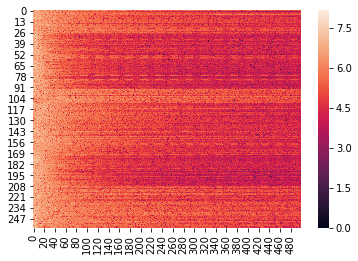

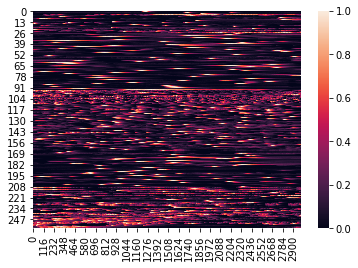

In [2]:
import seaborn as sns

sns.heatmap(fd)

plt.show()

sns.heatmap(td)

In [3]:
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity

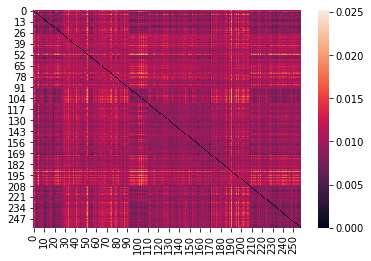

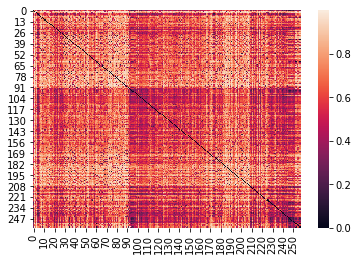

In [4]:
d_fd = cosine_distances(fd)

sns.heatmap(d_fd)

plt.show()

d_td = cosine_distances(td)

sns.heatmap(d_td)

In [5]:
from scipy.cluster.hierarchy import linkage, fcluster

In [8]:
Z_fd = linkage(d_fd, method='complete', optimal_ordering=True)
Z_td = linkage(d_td, method='complete', optimal_ordering=True)

/home/kushal/python-venvs/mesmerize/lib/python3.6/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.
/home/kushal/python-venvs/mesmerize/lib/python3.6/site-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


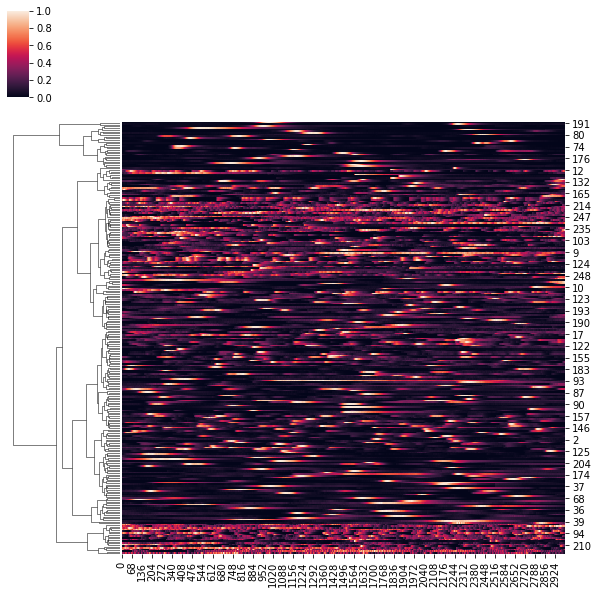

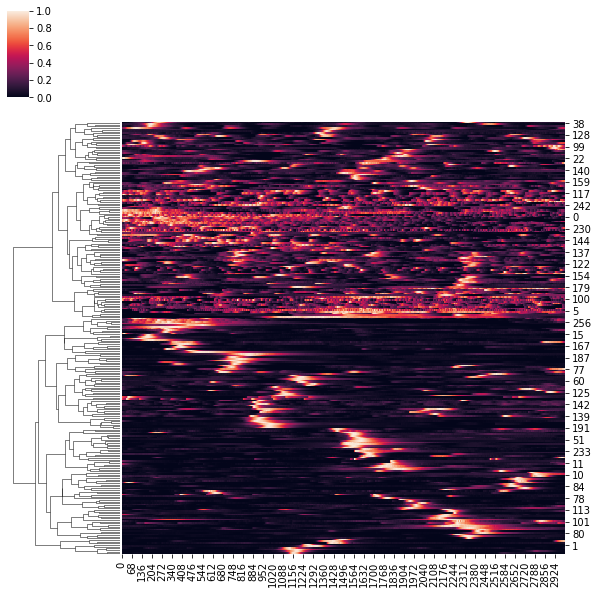

In [9]:
sns.clustermap(td, row_cluster=True, col_cluster=False, row_linkage=Z_fd)

sns.clustermap(td, row_cluster=True, col_cluster=False, row_linkage=Z_td)